In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
from matplotlib import pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from harc_plot import geopack
%matplotlib inline

Re = 6371 # Radius of the Earth in km

## Define Station Locations

In [2]:
tx = {}
tx['st_id'] = 'WWV'
tx['lat']   =  40.68
tx['lon']   = -105.04

In [3]:
grapes = []

g = {}
g['st_id'] = 'kd2uhn'
g['lat']   =  40.6332
g['lon']   = -74.98881
g['color'] = 'purple'
grapes.append(g)

g = {}
g['st_id'] = 'n2rkl'
g['lat']   =  43.16319
g['lon']   = -76.12535
g['color'] = 'green'
grapes.append(g)

g = {}
g['st_id'] = 'n8obj'
g['lat']   =  41.321963
g['lon']   = -81.504739
g['color'] = 'red'
grapes.append(g)

grapes = pd.DataFrame(grapes)
grapes = grapes.set_index('st_id')
grapes

,lat,lon,color
st_id,,,
kd2uhn,40.633200,-74.988810,purple
n2rkl,43.163190,-76.125350,green
n8obj,41.321963,-81.504739,red


## Calculate midpoints between Transmitter and Receivers

In [4]:
grapes

grapes_new = []
for rinx, row in grapes.iterrows():
    # print(rinx)
    lat = row['lat']
    lon = row['lon']
    
    azm = geopack.greatCircleAzm(tx['lat'],tx['lon'],lat,lon)
    rng = geopack.greatCircleDist(tx['lat'],tx['lon'],lat,lon)*Re
    res = geopack.greatCircleMove(tx['lat'],tx['lon'],rng/2.,azm,alt=0,Re=Re)
    
    row['mid_lat'] = res[0][0]
    row['mid_lon'] = res[1][0]
    
    grapes_new.append(row)
    
grapes = pd.DataFrame(grapes_new)
grapes

,lat,lon,color,mid_lat,mid_lon
kd2uhn,40.633200,-74.988810,purple,41.644169,-90.009011
n2rkl,43.163190,-76.125350,green,42.839187,-90.870155
n8obj,41.321963,-81.504739,red,41.604411,-93.330499


## Plot on a Map

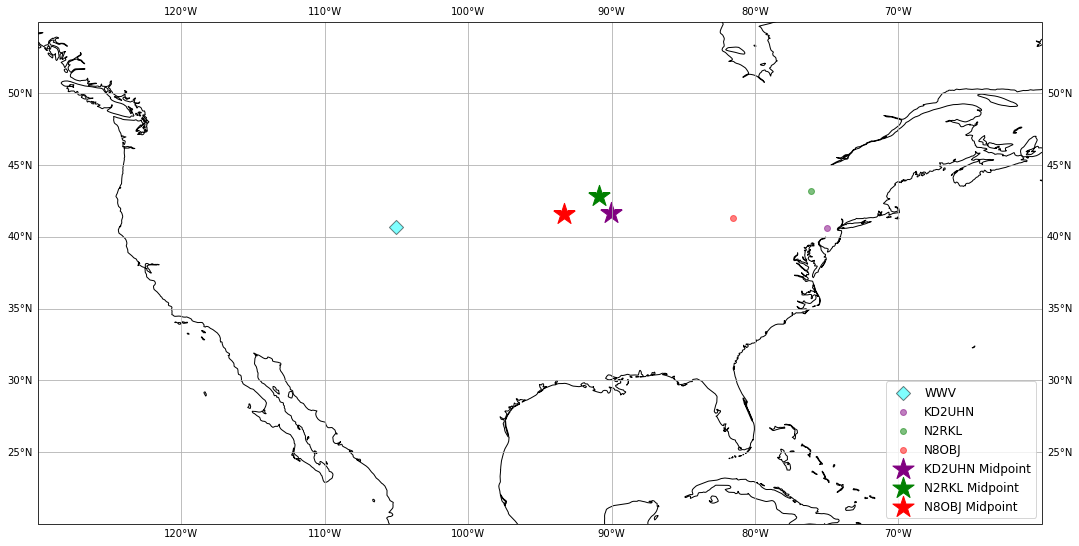

In [5]:
projection = ccrs.PlateCarree()
fig = plt.figure(figsize=(18,14))
ax  = fig.add_subplot(1,1,1,projection=projection)
ax.coastlines()
ax.gridlines(draw_labels=True)

alpha = 0.5
# Plot Transmitter
ax.scatter(tx['lon'],tx['lat'],marker='D',s=100,color='Cyan',label=tx['st_id'],ec='black',alpha=alpha)

# Plot Ground Locations of Grapes
for rinx,row in grapes.iterrows():
    lat   = row['lat']
    lon   = row['lon']
    label = rinx.upper()
    color = row['color']
    ax.scatter([lon],[lat],label=label,c=[mpl.colors.to_rgb(color)],alpha=alpha)
    
# Plot Grape Midpoints
for rinx,row in grapes.iterrows():
    lat   = row['mid_lat']
    lon   = row['mid_lon']
    label = '{!s} Midpoint'.format(rinx.upper())
    color = row['color']

    ax.scatter([lon],[lat],label=label,c=[mpl.colors.to_rgb(color)],marker='*',s=500)

ax.legend(loc='lower right',fontsize='large')
    
# # World Limits
# ax.set_xlim(-180,180)
# ax.set_ylim(-90,90)

# US Limits
ax.set_xlim(-130,-60)
ax.set_ylim(20,55)

plt.show()